# Import all libraries
```Importing all essential libraries for this project```

In [2]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import numpy as np
import sympy as smp

```Lets get started```

In [11]:


#Particle credentials:->

m=1
q=1
K=9*10**9
t_span = (0.01, 10)
t=np.linspace(t_span[0],t_span[1],1000)

#Defining function:->

def acc(state,t):
    x,y,z,vx,vy,vz=state


    v=np.array([vx,vy,vz])
    global E
    g=np.array([0,0,0])

    E=np.array([0,0,0])
    #I will add the EF due to the particle itself so that i can work with cluster of particles


    global B
    B=np.array([0,0,-10])

    a=(q/m)*(np.cross(v,B)+E)
    v_mod=np.linalg.norm(v)
    return vx,vy,vz,a[0],a[1],a[2]

state0=(0,0,0,1,1,0)

## Calculating some physical quantities

In [16]:
# Solve using solve_ivp

y0 = state0

# Wrapper for solve_ivp which expects fun(t, y)
def acc_ivp(t, state):
    return acc(state, t)

sol_ivp = solve_ivp(acc_ivp, t_span, y0, t_eval=t, method="DOP853",max_step=1e-3)

#KE calculation 🧮 :->

KE_list=[]
P_list=[]
for i in range(1000):
    vx=sol_ivp.y.T[i][3]
    vy=sol_ivp.y.T[i][4]
    vz=sol_ivp.y.T[i][5]
    v0=np.sqrt(vx**2+vy**2+vz**2)
    KE=(1/2)*m*(v0**2)
    P=m*v0
    KE_list.append(KE)
    P_list.append(P)

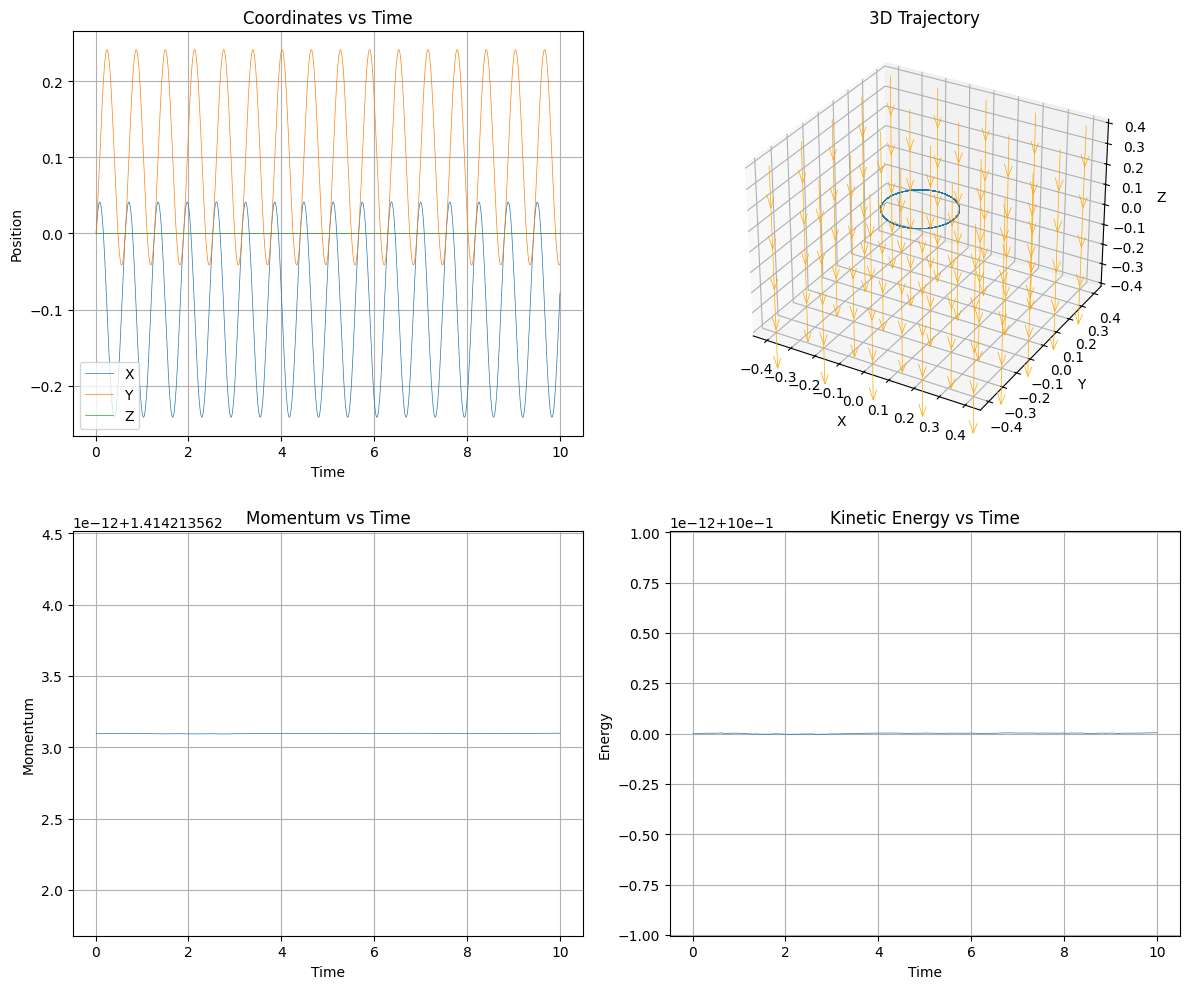

In [17]:
# Visualization
fig = plt.figure(figsize=(12, 10))


# 1. Coordinates vs Time (Combined)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(sol_ivp.t, sol_ivp.y[0],linewidth=0.5, label='X')
ax1.plot(sol_ivp.t, sol_ivp.y[1],linewidth=0.5, label='Y')
ax1.plot(sol_ivp.t, sol_ivp.y[2],linewidth=0.5, label='Z')
ax1.set_title('Coordinates vs Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.legend()
ax1.grid(True)

# 2. 3D Trajectory

n=5



x1 = np.linspace(-0.4,0.4, n)
y1 = np.linspace(-0.4,0.4, n)
z1 = np.linspace(-0.4,0.4, n)
X, Y, Z = np.meshgrid(x1, y1, z1)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot(sol_ivp.y[0], sol_ivp.y[1], sol_ivp.y[2],linewidth=0.5)
ax2.quiver(X, Y, Z, B[0]*0.02, B[1]*0.02, B[2]*0.02,color='orange',linewidth=0.5)
ax2.set_title('3D Trajectory')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.grid(True)


# 3. Momentum vs Time
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(sol_ivp.t, P_list,linewidth=0.5)
ax3.set_title('Momentum vs Time')
ax3.set_xlabel('Time')
ax3.set_ylabel('Momentum')
ax3.grid(True)

# 4. Kinetic Energy vs Time
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(sol_ivp.t, KE_list,linewidth=0.5)
ax4.set_title('Kinetic Energy vs Time')
ax4.set_xlabel('Time')
ax4.set_ylabel('Energy')
ax4.grid(True)

plt.tight_layout()
plt.show()